Raw data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Processed feature matrix shape: (7043, 30)
Churn rate in full dataset: 26.54% positive
Train size: 5634, Test size: 1409
After SMOTE oversampling, training size: 8278 (Churn=1 count: 4139)
Accuracy: 0.7530
Precision (Positive=Churn): 0.5280
Recall (Positive=Churn): 0.6551
F1-Score (Positive=Churn): 0.5847

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.66      0.58       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409


Confusion Matrix (Actual vs Predicted):
[[816 219]
 [129 245]]
AUC Score: 0.8069


c:\Users\rich_\OneDrive\4. Python\Classification\telecom customer churn\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:21:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


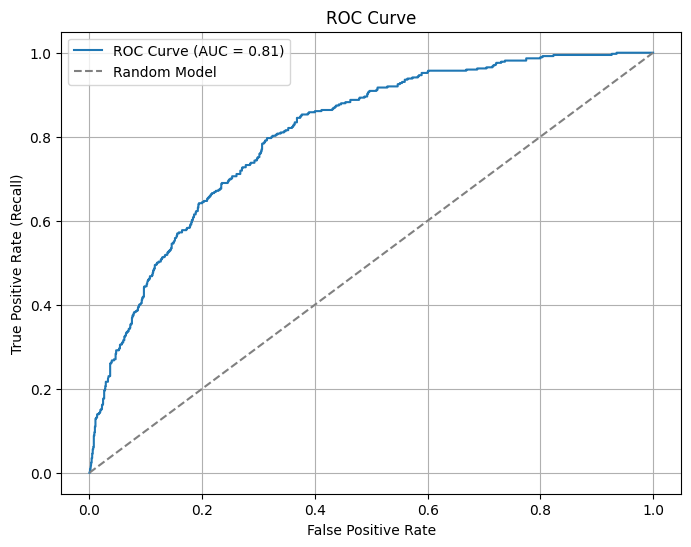

In [1]:
import os
import sys

# Make src/ importable
project_root = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(project_root, "src"))

# 1. Import necessary modules
from classification_model import data_load, features, train, evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 2. Load the raw data
df = data_load.load_data()
print(f"Raw data shape: {df.shape}")
display(df.head(5))  # Show first 5 rows of the dataset

# 3. Preprocess the data
X, y = features.preprocess_data(df)
print(f"Processed feature matrix shape: {X.shape}")
print(f"Churn rate in full dataset: {y.mean():.2%} positive")

# 4. Split into train/test sets for modeling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

# 5. Handle class imbalance on training data (oversample churn=Yes)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(f"After SMOTE oversampling, training size: {X_train_bal.shape[0]} (Churn=1 count: {sum(y_train_bal==1)})")

# 6. Train the model (using XGBoost in this example)
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_bal, y_train_bal)

# 7. Evaluate the model on test set
y_pred = model.predict(X_test)
evaluation.evaluate_model(y_test, y_pred)

# 8. Plot ROC curve
y_probs = model.predict_proba(X_test)[:, 1]
evaluation.plot_roc_curve(y_test, y_probs)


In [ ]:
# Connecting to classification_model/train.py to test different models

import os
import sys

project_root = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(project_root, "src"))

from classification_model import train

model, X_test, y_test= train.train_and_evaluate(model_name="logistic")
print(model)
print("-------------------")
model, X_test, y_test= train.train_and_evaluate(model_name="xgb")
print(model)
print("-------------------")
model, X_test, y_test= train.train_and_evaluate(model_name="lgbm")
print(model)
print("-------------------")
model, X_test, y_test= train.train_and_evaluate(model_name="rf")
print(model)


Training size before/after SMOTE: 5634/8278
Accuracy: 0.7388
Precision (Positive=Churn): 0.5057
Recall (Positive=Churn): 0.7139
F1-Score (Positive=Churn): 0.5920

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.51      0.71      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409


Confusion Matrix (Actual vs Predicted):
[[774 261]
 [107 267]]
Top features by (abs) coefficient:
 MonthlyCharges                 8.289715
InternetService_Fiber optic    7.701359
PhoneService_Yes               3.957798
StreamingMovies_Yes            2.975079
StreamingTV_Yes                2.915695
MultipleLines_Yes              1.825432
tenure                         1.459265
DeviceProtection_Yes           1.375570
OnlineBackup_Yes               1.207351
Contract_Two year          

c:\Users\rich_\OneDrive\4. Python\Classification\telecom customer churn\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:48:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7530
Precision (Positive=Churn): 0.5280
Recall (Positive=Churn): 0.6551
F1-Score (Positive=Churn): 0.5847

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.66      0.58       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409


Confusion Matrix (Actual vs Predicted):
[[816 219]
 [129 245]]
Top features by importance:
 Contract_Two year                 0.323405
InternetService_Fiber optic       0.098071
Contract_One year                 0.092765
MultipleLines_No phone service    0.090659
InternetService_No                0.065601
StreamingMovies_Yes               0.043047
PaymentMethod_Electronic check    0.042544
PaperlessBilling_Yes              0.027949
tenure                            0.023514
MultipleLines_Yes                 0.021039
dtype: f